In [1]:
# Pacotes 
import pandas as pd                                                                    # Manipulação de dados
import numpy as np                                                                     # Computação matemática 
import seaborn as sns                                                                  # Plotagem grafica 
import matplotlib.pyplot as plt                                                        # Plotagem grafica 
import scipy as sc                                                                     # Computação matemática (estatistica) 
from sklearn.model_selection import train_test_split                                   # Transformação das amostras de treino e teste
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor                 # Modelo de Knn 
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error  # Metricas de performance 

In [2]:
# Importando os dados
df = pd.read_csv('pov19ce.csv').drop(['Unnamed: 0', 'hh_id', 'pobre_ex'], axis = 1)
df = df.dropna(subset=['esgoto_ad'])

In [3]:
# Definição de uma lista com nomes das variáveis categoricas
cat_vars = ['area', 'casal', 'genero', 'raca', 'escolaridade', 'atividade', 'aposentadoria', 
            'dom_tipo', 'agua_adeq', 'esgoto_ad', 'banheiro', 'paredes', 'casa_tipo', 
            'geladeira', 'maquina_lavar', 'tv', 'computador', 'internet', 'carro', 'moto']

In [4]:
# Definição de uma lista com nomes das variáveis numéricas
num_vars = ['idade', 'n_moradores', 'n_criancas', 'n_adultos', 'densidade', 'fone_pc']

## Pre-processamento

In [25]:
columns = df.columns 

for column in columns:
    if df[column].dtype != 'int64':
        try:
            df[column] = df[column].astype('int64')
        except:
            if len(np.unique(df[column])) <= 2:
                df[column] = pd.get_dummies(df[column])[np.unique(df[column])[0]]
                    

In [30]:
X = df.drop(['pobre','escolaridade','atividade','casa_tipo'],axis=1) # TODO: Incluir outras variaveis dummies 
Y = df['pobre']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [46]:
# Calculando o teste de elbow
rmse_loop = [] 
for k in range(0,20):
    k = k+1 
    model = KNeighborsRegressor(n_neighbors = k)  #TODO: Verificar
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test,pred))
    rmse_loop.append(error)

# Criando o classificador

In [50]:
classifier = KNeighborsClassifier(2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [53]:
matriz_confusão = confusion_matrix(y_test, y_pred)
matriz_confusão

array([[530,   3],
       [  8, 929]])

In [55]:
metricas = classification_report(y_test, y_pred)
print(metricas)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       533
           1       1.00      0.99      0.99       937

    accuracy                           0.99      1470
   macro avg       0.99      0.99      0.99      1470
weighted avg       0.99      0.99      0.99      1470



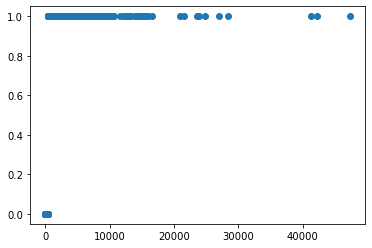

In [71]:
plt.scatter(X['rdpc'],Y)